Map(center=[3.1, 101.7], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

Output()

DatePicker(value=None, description='Start Time', step=1)

DatePicker(value=None, description='End Time', step=1)

Button(description='Done', style=ButtonStyle())

Authenticated using refresh token.


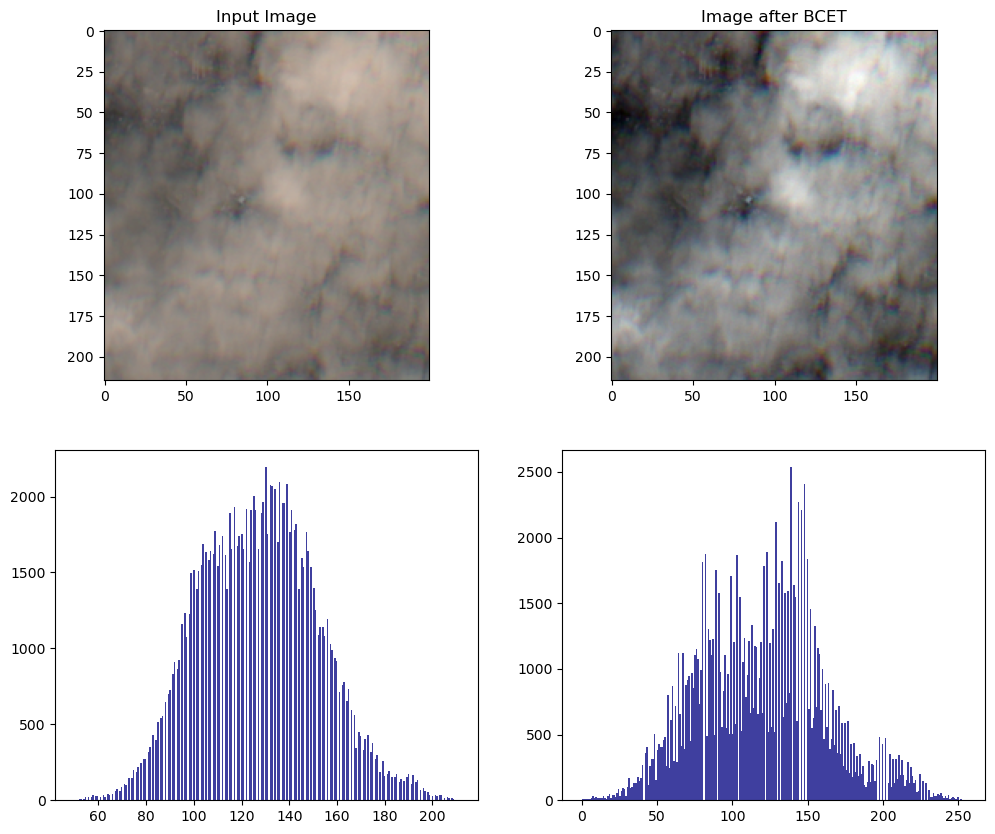

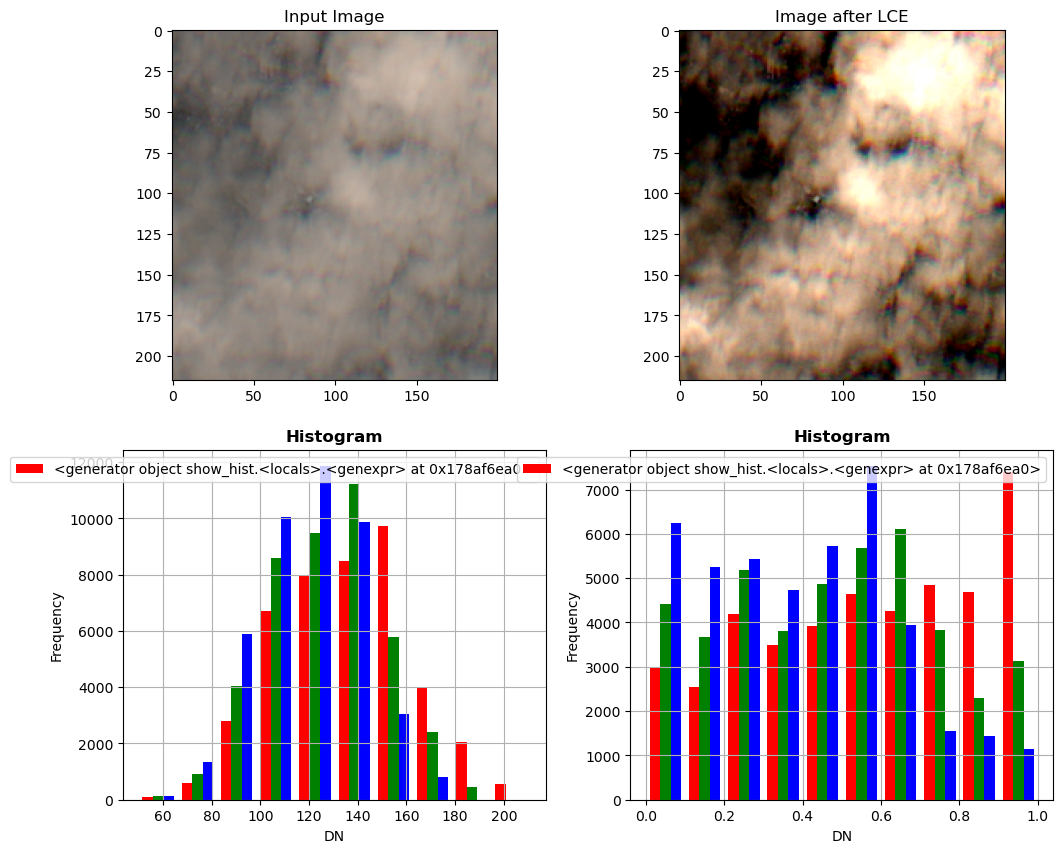

Authenticated using refresh token.


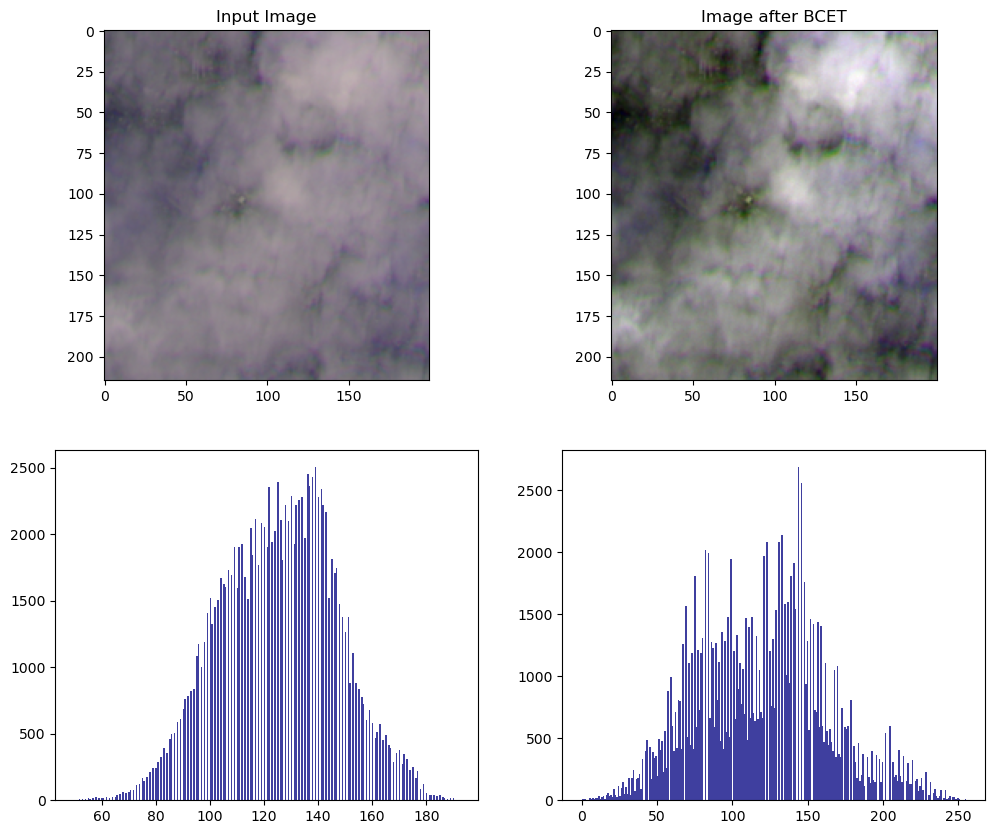

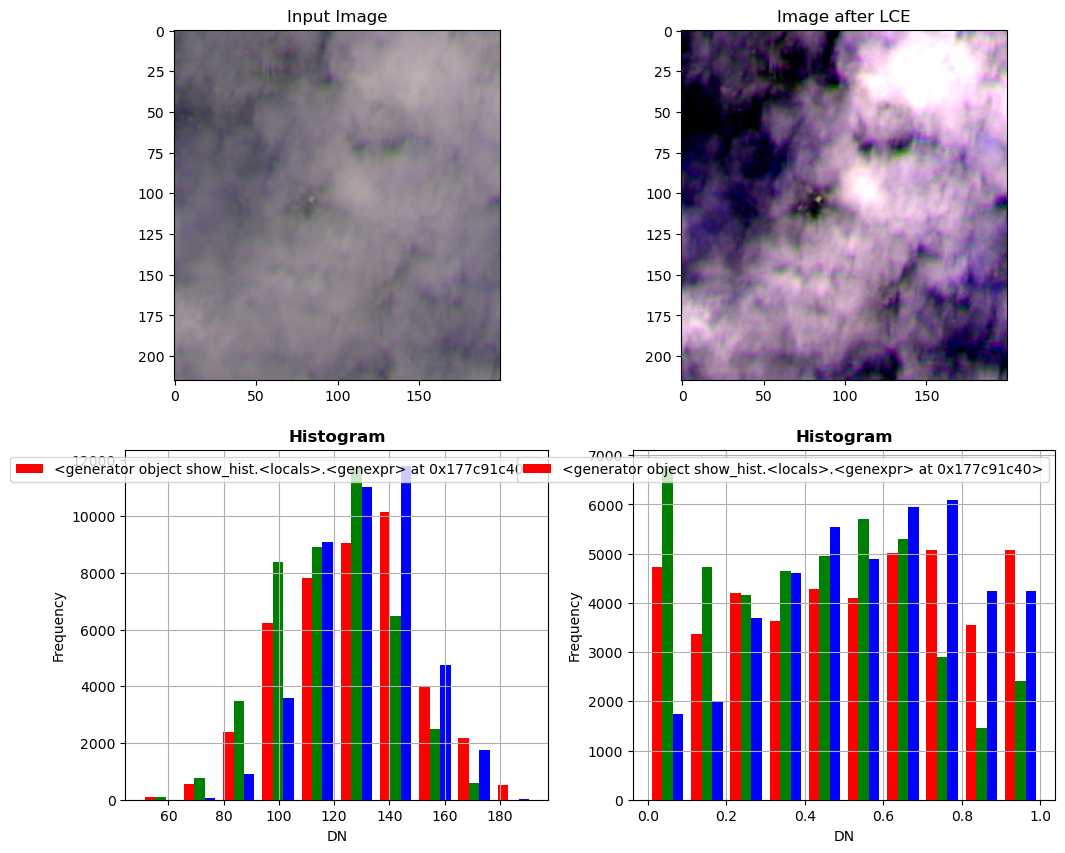

Authenticated using refresh token.


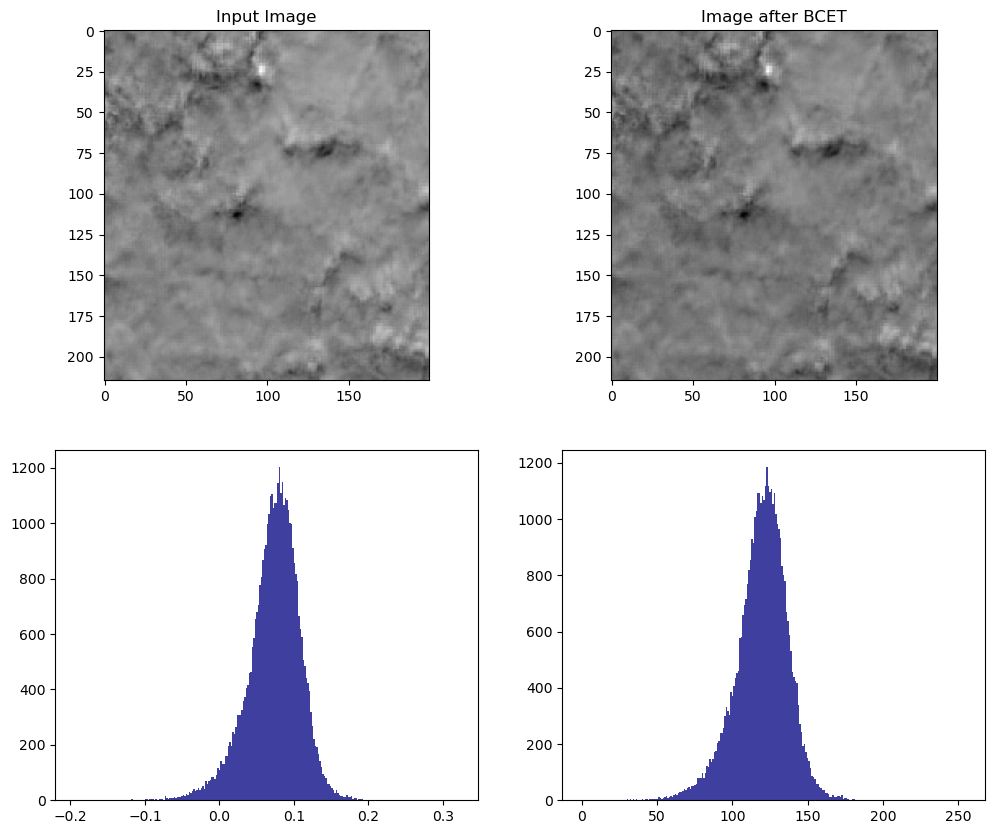

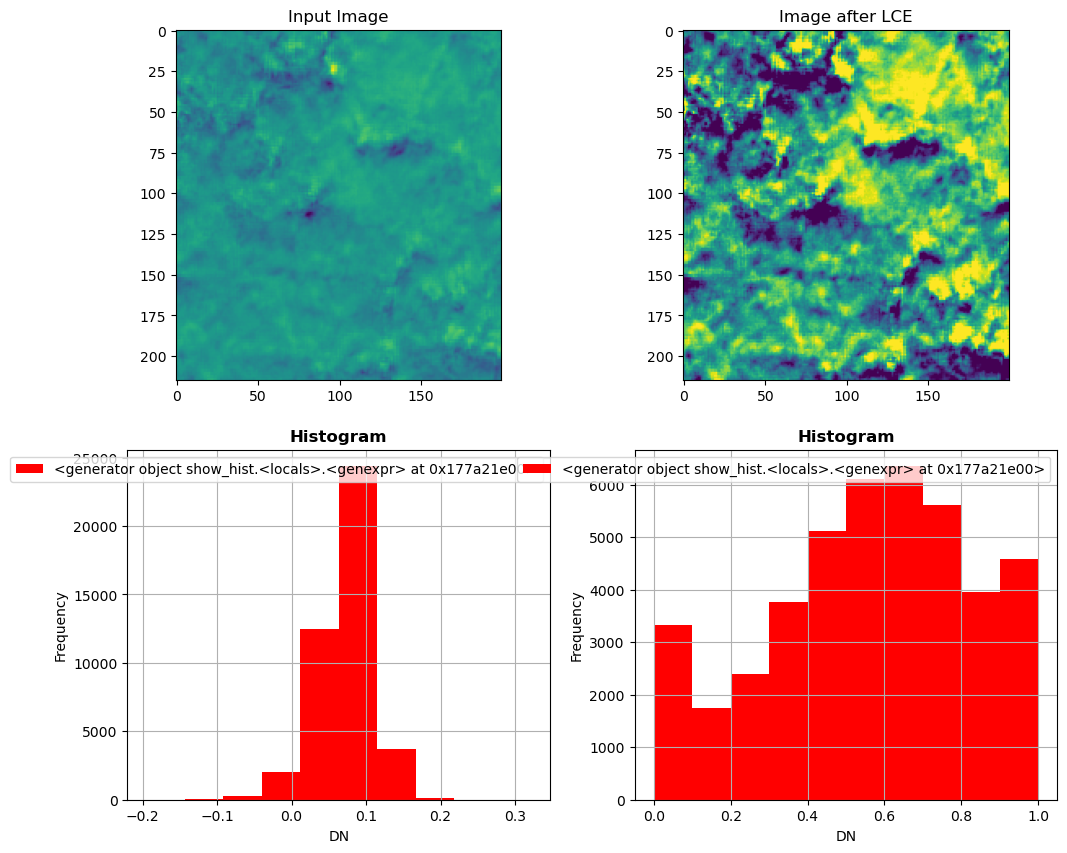

Authenticated using refresh token.


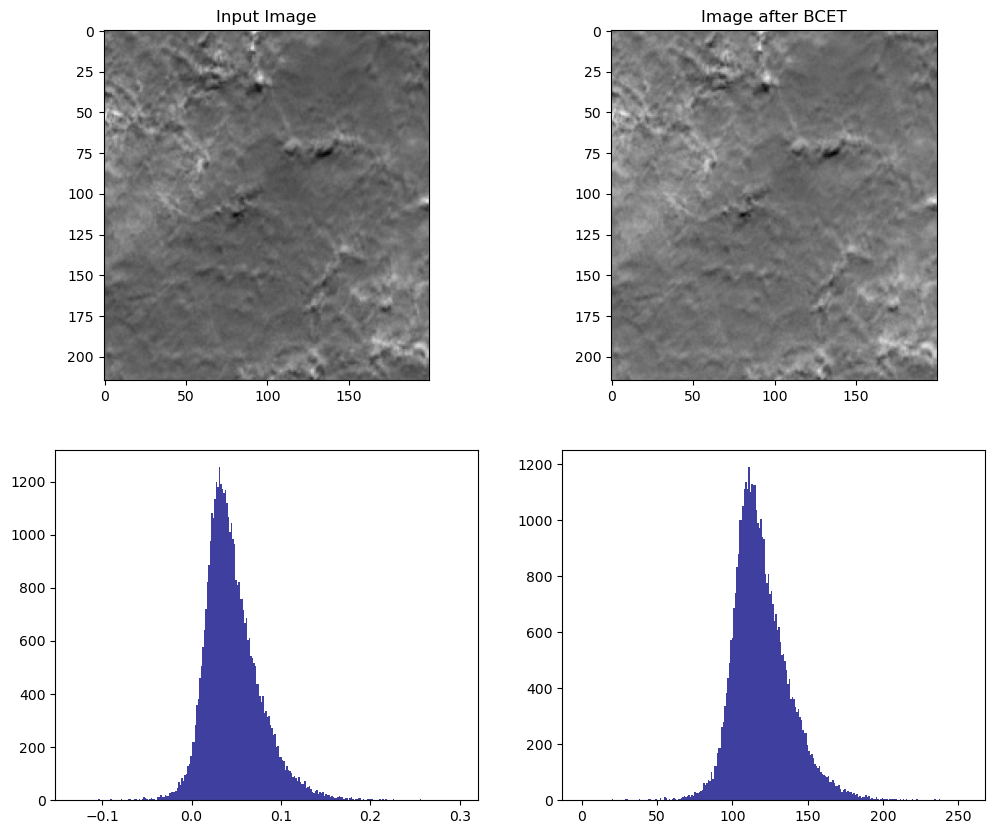

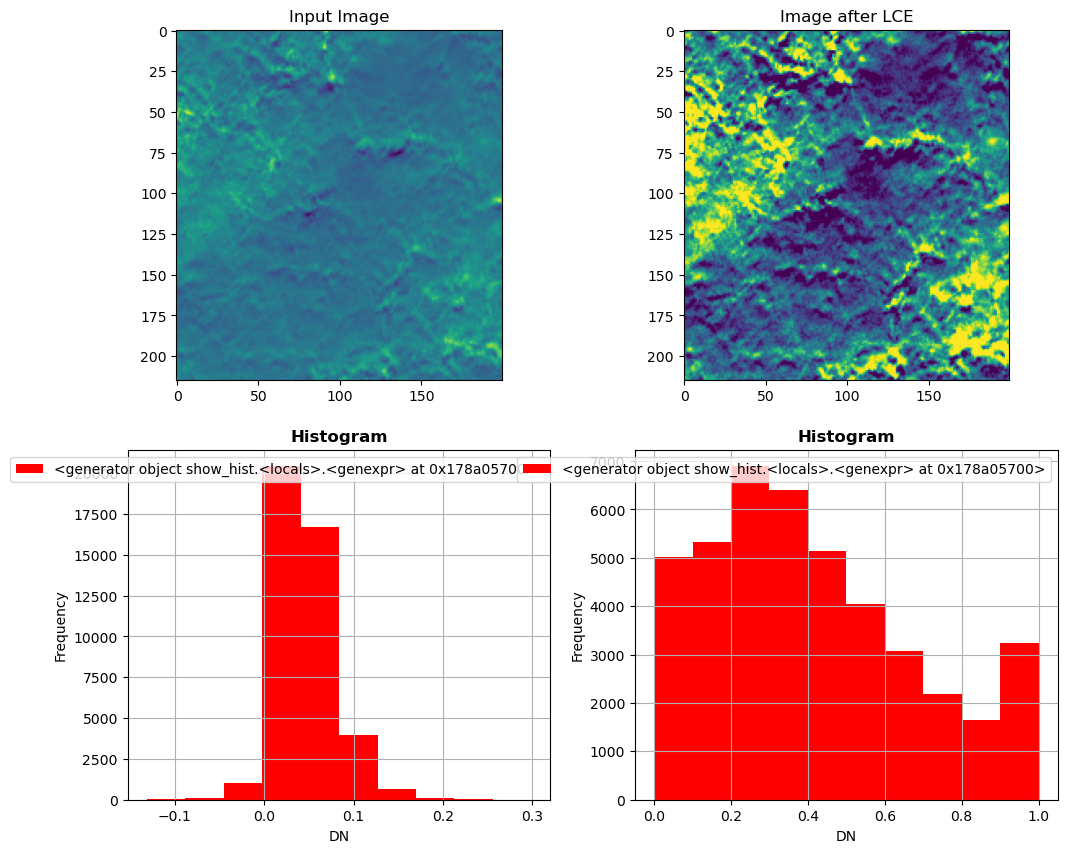

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import openeo
import shapely.geometry
from shapely.geometry import Polygon, box, MultiPolygon
from shapely.ops import unary_union
from ipyleaflet import Map, basemaps, DrawControl, GeoData
from ipywidgets import Button, Output, DatePicker
from IPython.display import display
import LCE
import BCET
from openeo.processes import ProcessBuilder
import functions2
import datetime as dt

# Create a map
m = Map(center=(3.1, 101.7), zoom=5, basemap=basemaps.OpenStreetMap.Mapnik)

# Create a draw control
draw_control = DrawControl(polygon={'shapeOptions': {'color': '#0000FF'}})
m.add_control(draw_control)

# Display the map
display(m)

# Create an output widget to display results
output = Output()
display(output)

# Create date picker widgets for the start and end time
start_time_picker = DatePicker(description='Start Time')
end_time_picker = DatePicker(description='End Time')
press_this = Button(description='Done')

display(start_time_picker)
display(end_time_picker)
display(press_this)

polygon = None

# Function to execute when a new shape is drawn
def handle_draw(self, action, geo_json):
    global polygon
    # Get the coordinates of the polygon
    coords = geo_json['geometry']['coordinates'][0]
    polygon = Polygon(coords)

    # Define the size of your square sections (in degrees)
    square_size = 0.005

    # Create a grid of squares within your area of interest
    squares = []
    for x in np.arange(min([coord[0] for coord in coords]), max([coord[0] for coord in coords]), square_size):
        for y in np.arange(min([coord[1] for coord in coords]), max([coord[1] for coord in coords]), square_size):
            square = box(x, y, x+square_size, y+square_size)
            if polygon.intersects(square):
                squares.append(square)

    # Create a GeoDataFrame for the squares
    squares_gdf = gpd.GeoDataFrame(gpd.GeoSeries(squares), columns=['geometry'])

    # Display the squares on the map
    m.add_layer(GeoData(geo_dataframe=squares_gdf))

# Attach the function to the draw control
draw_control.on_draw(handle_draw)

# Function to execute when the 'Done' button is clicked
def handle_button_click(b):
    global polygon
    start_time = start_time_picker.value.strftime('%Y-%m-%d')
    end_time = end_time_picker.value.strftime('%Y-%m-%d')

    functions2.tcc(polygon, start_time, end_time)
    functions2.fcc(polygon, start_time, end_time)
    functions2.nbr(polygon, start_time, end_time)
    functions2.ndvi(polygon, start_time, end_time)


# Attach the function to the 'Done' button
press_this.on_click(handle_button_click)
